# simple linear regression. 


In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils


In [4]:
# model: W*x -b, error: (f(x) - y)^2
DATA_FILE = '../data/fire_theft.xls'


In [5]:
# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [6]:
# placeholder for variables and labels
x = tf.placeholder(tf.float32, name="x")
y = tf.placeholder(tf.float32, name = "y")


In [8]:
# for weight and bias
W = tf.Variable(0.0, name = "W")
b = tf.Variable(0.0, name = "b")


In [37]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    condition = tf.less(residual, delta)
    small_res = 0.5 * tf.square(residual)
    large_res = delta * residual - 0.5 * tf.square(delta)
    return tf.where(condition, small_res, large_res)

In [35]:
with tf.Session() as sess: 
    print(sess.run(tf.where(True, 2, 3)))N

2


In [38]:
# model for prediction and loss. 
y_prediction = W*x + b
#loss = tf.square(y - y_prediction, name = "loss")
loss = huber_loss(y, y_prediction)

In [42]:
# optimizer and gradient descent. 
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

ValueError: No gradients provided for any variable, check your graph for ops that do not support gradients, between variables ["<tf.Variable 'W:0' shape=() dtype=float32_ref>", "<tf.Variable 'b:0' shape=() dtype=float32_ref>"] and loss Tensor("Select_3:0", dtype=float32).

In [40]:
with tf.Session() as sess:
	# Step 7: initialize the necessary variables, in this case, w and b
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
	
	# Step 8: train the model
	for i in range(50): # train the model 100 epochs, going through data 50 times. 
		total_loss = 0
		for datax, datay in data:
			# Session runs train_op and fetch values of loss
			_, l = sess.run([optimizer, loss], feed_dict={x: datax, y:datay}) 
			total_loss += l
		print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# close the writer when you're done using it
	writer.close() 
	
	# Step 9: output the values of w and b
	W, b = sess.run([W, b]) 


Epoch 0: 14.002018927219545
Epoch 1: 14.002018927219545
Epoch 2: 14.002018927219545
Epoch 3: 14.002018927219545
Epoch 4: 14.002018927219545
Epoch 5: 14.002018927219545
Epoch 6: 14.002018927219545
Epoch 7: 14.002018927219545
Epoch 8: 14.002018927219545
Epoch 9: 14.002018927219545
Epoch 10: 14.002018927219545
Epoch 11: 14.002018927219545
Epoch 12: 14.002018927219545
Epoch 13: 14.002018927219545
Epoch 14: 14.002018927219545
Epoch 15: 14.002018927219545
Epoch 16: 14.002018927219545
Epoch 17: 14.002018927219545
Epoch 18: 14.002018927219545
Epoch 19: 14.002018927219545
Epoch 20: 14.002018927219545
Epoch 21: 14.002018927219545
Epoch 22: 14.002018927219545
Epoch 23: 14.002018927219545
Epoch 24: 14.002018927219545
Epoch 25: 14.002018927219545
Epoch 26: 14.002018927219545
Epoch 27: 14.002018927219545
Epoch 28: 14.002018927219545
Epoch 29: 14.002018927219545
Epoch 30: 14.002018927219545
Epoch 31: 14.002018927219545
Epoch 32: 14.002018927219545
Epoch 33: 14.002018927219545
Epoch 34: 14.00201892721

TypeError: Fetch argument 1.9974703 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

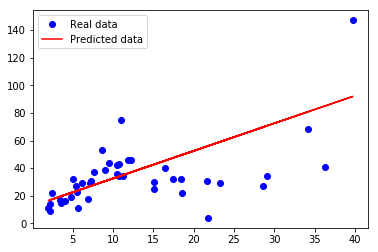

In [41]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * W + b, 'r', label='Predicted data')
plt.legend()
plt.show()

In [18]:
data.shape

writer = tf.summary.FileWriter('./graphs/03/linear_reg',
sess.graph)

(42, 2)

In [24]:
W, b

(1.9974703, 12.568723)